In [2]:
import pandas as pd
import Bio.SeqIO as IO
from tqdm.auto import tqdm
import numpy as np
from pandas.api.types import CategoricalDtype

In [4]:
species= ['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI']

### Gene length table with only canonical isoforms
All these tables have been precomputed (see bellow).
Alternatively, if you would like to run these with your own data, know that it takes a while

In [4]:
path = 'path/todirectory/withall/OMAfolders/'
methods =['topAugustus', 'UniProt', 'primNCBI', 'topNCBI', 'primEnsembl', 'topEnsembl']
folder= '/DB/'
extension = '.fa'
method2=[]
spp2=[]
records2=[]
lengths2=[]
methodsisos=['primNCBI', 'topNCBI', 'primEnsembl', 'topEnsembl']


for m in methods:
    print(m)
    if m in methodsisos:
        for s in species:
            print(s)
            isoslist=[] #List with all isoforms
            usedisos= [] #List with used isoforms
            with open(path+m+folder+s+'.splice', 'r') as infile:
                lines=infile.readlines()
                for l in lines:
                    lineisos = l.split(';')
                    if len(lineisos)>1:
                        for i in lineisos:
                            isoslist.append(i.rstrip())
                            
            with open(path+m+'/Output/used_splicing_variants.txt') as infile2:
                lines=infile2.readlines()
                for l in lines:
                    if l.split('\t')[0] == s:
                        name =l.split('\t')[1]
                        caniso = name.split(' ')[0]
                        usedisos.append(caniso)
                        
            for record in IO.parse(path+m+folder+s+extension, "fasta"):
                if record.id in isoslist:
                    if record.id in usedisos:
                        method2.append(m)
                        spp2.append(s)
                        records2.append(record.id)
                        lengths2.append(len(record.seq))
                    else:
                        continue
                        
                else:
                    method2.append(m)
                    spp2.append(s)
                    records2.append(record.id)
                    lengths2.append(len(record.seq))
    else:
        for s in tqdm(species):
            for record in IO.parse(path+m+folder+s+extension, "fasta"):
                method2.append(m)
                spp2.append(s)
                records2.append(record.id)
                lengths2.append(len(record.seq))
            
genelength2=pd.DataFrame({'Method': method2, 'Species': spp2, 'Protein': records2, 'Length': lengths2})

OMAAugustus20


100%|██████████| 20/20 [00:06<00:00,  3.32it/s]


OMARP20


100%|██████████| 20/20 [00:04<00:00,  4.84it/s]


OMAprimNCBI20
CIOIN
LEPOC
DANRE
SALTR
GADMO
ORYLA
ECNAU
ERCAL
XENTR
CHPIB
CHICK
KAKAP
TAEGU
PODMU
ORANA
SARHA
HUMAN
MOUSE
FELCA
PHOSI
OMAtopNCBI20
CIOIN
LEPOC
DANRE
SALTR
GADMO
ORYLA
ECNAU
ERCAL
XENTR
CHPIB
CHICK
KAKAP
TAEGU
PODMU
ORANA
SARHA
HUMAN


KeyboardInterrupt: 

In [ ]:
#genelength2.to_csv('CanonicalProteinsLength_3_correction.csv')

# Protein length distribution for non-orthologs and orthologous genes 

In [12]:
path1='path/todirectory/withall/OMAfolders/'
methods =['topAugustus', 'UniProt', 'primNCBI', 'topNCBI', 'primEnsembl', 'topEnsembl']
path2='/Output/PairwiseOrthologs/'

codes=['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI']


import os
from collections import defaultdict

# Initialize 'Orthologs' and 'Total_relationships' columns with default values

relstotals = []
ortotals = []
spe=[]
metodo=[]

orthologs=defaultdict(lambda: defaultdict(lambda: defaultdict(int))) ## RESULTING DICTIONARY

for m in tqdm(methods):

    fns = os.listdir(path1+m+path2)
    
    for fn in fns:
        z = fn.split('.')[0].split('-')
        if len(z) == 2:
            (sp1, sp2) = z
        else:
            # not pairwise file
            continue
            
        f=open(path1+m+path2+fn,'r')
        lines= f.readlines()[4:]
        for l in lines:
            gene1= l.split('\t')[2].split()[0]
            gene2= l.split('\t')[3].split()[0]
            orthologs[m][sp1][gene1]+=1
            orthologs[m][sp2][gene2]+=1

100%|██████████| 6/6 [01:56<00:00, 19.48s/it]


In [16]:
len(list(orthologs['OMAtopEnsembl20']['MOUSE']))

21397

# Table of all non-orthologous genes (canonical proteins)

In [13]:
path = 'path/todirectory/withall/OMAfolders/'
methods =['OMAAugustus20', 'OMARP20', 'OMAprimNCBI20', 'OMAtopNCBI20', 'OMAprimEnsembl20', 'OMAtopEnsembl20']
folder= '/DB/'
methodsisos=['primNCBI', 'topNCBI', 'primEnsembl', 'topEnsembl']
methodsn=[]
sppn=[]
recordsn=[]
lengthsn=[]


for m in methods:
    if m in methodsisos:
        
        usedisos=[]
        with open(path+m+'/Output/used_splicing_variants.txt') as infile2:
            lines=infile2.readlines()
            for l in lines:
                name =l.split('\t')[1]
                caniso = name.split(' ')[0]
                usedisos.append(caniso)
        
        for s in tqdm(species):
            
            isoslist=[]
            with open(path+m+folder+s+'.splice', 'r') as infile:
                lines=infile.readlines()
                for l in lines:
                    lineisos = l.split(';')
                    if len(lineisos)>1:
                        for i in lineisos:
                            isoslist.append(i.rstrip())
        
                
            for record in IO.parse(path+m+folder+s+'.fa', "fasta"):
                if record.id in orthologs[m][s]:
                    continue
                else:
                    if record.id in isoslist:
                        if record.id in usedisos:
                            methodsn.append(m)
                            sppn.append(s)
                            recordsn.append(record.id)
                            lengthsn.append(len(record.seq))
                        else:
                            continue
                    else:
                        methodsn.append(m)
                        sppn.append(s)
                        recordsn.append(record.id)
                        lengthsn.append(len(record.seq))
    else:
        for s in tqdm(species):
            for record in IO.parse(path+m+folder+s+'.fa', "fasta"):
                if record.id in orthologs[m][s]:
                    continue
                else:
                    methodsn.append(m)
                    sppn.append(s)
                    recordsn.append(record.id)
                    lengthsn.append(len(record.seq))


notorthlength=pd.DataFrame({'Method': methodsn, 'Species': sppn, 'Protein': recordsn, 'Length': lengthsn})

100%|██████████| 20/20 [17:47<00:00, 53.39s/it]


In [15]:
#notorthlength.to_csv('NonOrthologus-Canonical-Proteins_length.csv')

,Method,Species,Protein,Length
0,OMAAugustus20,CIOIN,CIOINg2.t1,408
1,OMAAugustus20,CIOIN,CIOINg6.t1,283
2,OMAAugustus20,CIOIN,CIOINg8.t1,966
3,OMAAugustus20,CIOIN,CIOINg10.t1,152
4,OMAAugustus20,CIOIN,CIOINg13.t1,841
...,...,...,...,...
463547,OMAtopEnsembl20,PHOSI,ENSPSNP00000031288.1,174
463548,OMAtopEnsembl20,PHOSI,ENSPSNP00000031333.1,145
463549,OMAtopEnsembl20,PHOSI,ENSPSNP00000031440.1,129
463550,OMAtopEnsembl20,PHOSI,ENSPSNP00000031452.1,125


In [13]:
path = '/work/FAC/FBM/DBC/cdessim2/default/sprietob/'
methods =['topAugustus', 'UniProt', 'primNCBI', 'topNCBI', 'primEnsembl', 'topEnsembl']
folder= '/DB/'
methodsisos=['primNCBI', 'topNCBI', 'primEnsembl', 'topEnsembl']
methodso=[]
sppo=[]
recordso=[]
lengthso=[]


for m in methods:

    for s in tqdm(species):
            
        for record in IO.parse(path+m+folder+s+'.fa', "fasta"):
            if record.id in orthologs[m][s]:
                    methodso.append(m)
                    sppo.append(s)
                    recordso.append(record.id)
                    lengthso.append(len(record.seq))


orthlength=pd.DataFrame({'Method': methodso, 'Species': sppo, 'Protein': recordso, 'Length': lengthso})

100%|██████████| 20/20 [00:05<00:00,  3.82it/s]


In [17]:
#orthlength.to_csv('Orthologous-Canonical-Proteins_length.csv')

In [5]:
orthlength=pd.read_csv('Orthologous-Canonical-Proteins_length.csv')

In [6]:
notorthlength= pd.read_csv('NonOrthologus-Canonical-Proteins_length.csv')

In [7]:
genelength=pd.read_csv('GeneLength.csv')

In [8]:
genelength2=pd.read_csv('CanonicalProteinsLength_3_correction.csv')

In [9]:
especies=['CIOIN','ERCAL','LEPOC','DANRE','SALTR','GADMO','ECNAU', 'ORYLA', 'XENTR', 'PODMU', 'CHPIB', 
          'CHICK', 'TAEGU', 'KAKAP', 'ORANA', 'SARHA', 'PHOSI', 'FELCA', 'MOUSE', 'HUMAN']

In [10]:
from pandas.api.types import CategoricalDtype

speciesorder = CategoricalDtype(especies, ordered=True)
notorthlength['Species'] = notorthlength['Species'].astype(speciesorder)
orthlength['Species'] = orthlength['Species'].astype(speciesorder)
notorthlength=notorthlength.sort_values('Species')
orthlength=orthlength.sort_values('Species')

In [11]:
from pandas.api.types import CategoricalDtype

speciesorder = CategoricalDtype(especies, ordered=True)
genelength2['Species'] = genelength2['Species'].astype(speciesorder)
genelength2=genelength2.sort_values('Species')

In [12]:
corr=pd.DataFrame({'Code': ['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 
                            'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'],
                   'Especies': ['C. intestinalis (vase tunicate)', 'L. oculatus (spotted gar)', 'D. rerio (zebrafish)', 
              'S. trutta (brown trout)','G. morhua (Atlantic cod)', 'O. latipes (medaka fish)', 'E. naucrates (live sharksucker)',
              'E. calabaricus (reedfish)', 'X. tropicalis (western clawed frog)', 'C. p. bellii (painted turtle)',
              'G. gallus (chicken)', 'S. habroptila (kakapo)', 'T. guttata (zebra finch)', 
              'P. muralis (wall lizard)','O. anatinus (platypus)', 'S. harrisii (tasmanian devil)', 
              'H. sapiens (human)', 'M. musculus (house mouse)', 'F. catus (domestic cat)', 'P. sinus (vaquita)']})

In [13]:
methodsrename=pd.DataFrame({'Software': ['OMAAugustus20', 'OMARP20', 'OMAprimEnsembl20','OMAtopEnsembl20','OMAprimNCBI20','OMAtopNCBI20'], 
                           'Method':['Ab-initio', 'UniProt', 'primEnsembl', 'Ensembl','primNCBI', 'NCBI']})

In [14]:
genelength2['Method']= genelength2['Method'].map(methodsrename.set_index('Software')['Method'])

In [15]:
notorthlength['Method']= notorthlength['Method'].map(methodsrename.set_index('Software')['Method'])

In [16]:
orthlength['Method']= orthlength['Method'].map(methodsrename.set_index('Software')['Method'])

In [17]:
genelength2['Species']= genelength2['Species'].map(corr.set_index('Code')['Especies'])

In [18]:
orthlength['Species']= orthlength['Species'].map(corr.set_index('Code')['Especies'])

In [19]:
notorthlength['Species']= notorthlength['Species'].map(corr.set_index('Code')['Especies'])

In [20]:
orthlength=orthlength.drop(columns=['Unnamed: 0'])
notorthlength=notorthlength.drop(columns=['Unnamed: 0'])

In [21]:
genelength2= genelength2.drop(columns=['Unnamed: 0'])

### PLOTTING

Choose methods to plot

In [23]:
toplot=['Ab-initio', 'UniProt', 'Ensembl','NCBI']

In [24]:
genelength2plot=genelength2.loc[genelength2['Method'].isin(toplot)]

In [25]:
genelength2plot

,Method,Species,Protein,Length
0,Ab-initio,C. intestinalis (vase tunicate),CIOINg1.t1,1425
2359682,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000007268.3,87
2359681,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000016940.3,102
2359680,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000028398.2,235
2359679,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000035937.1,66
...,...,...,...,...
571457,Ab-initio,H. sapiens (human),HUMANg15972.t1,306
571456,Ab-initio,H. sapiens (human),HUMANg15971.t1,123
571455,Ab-initio,H. sapiens (human),HUMANg15970.t1,752
571454,Ab-initio,H. sapiens (human),HUMANg15969.t1,156


Optional: calculate logarithm of length (for plotting the log-transformed distribution)

In [25]:
import matplotlib

In [27]:
matplotlib.__version__

'3.7.2'

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

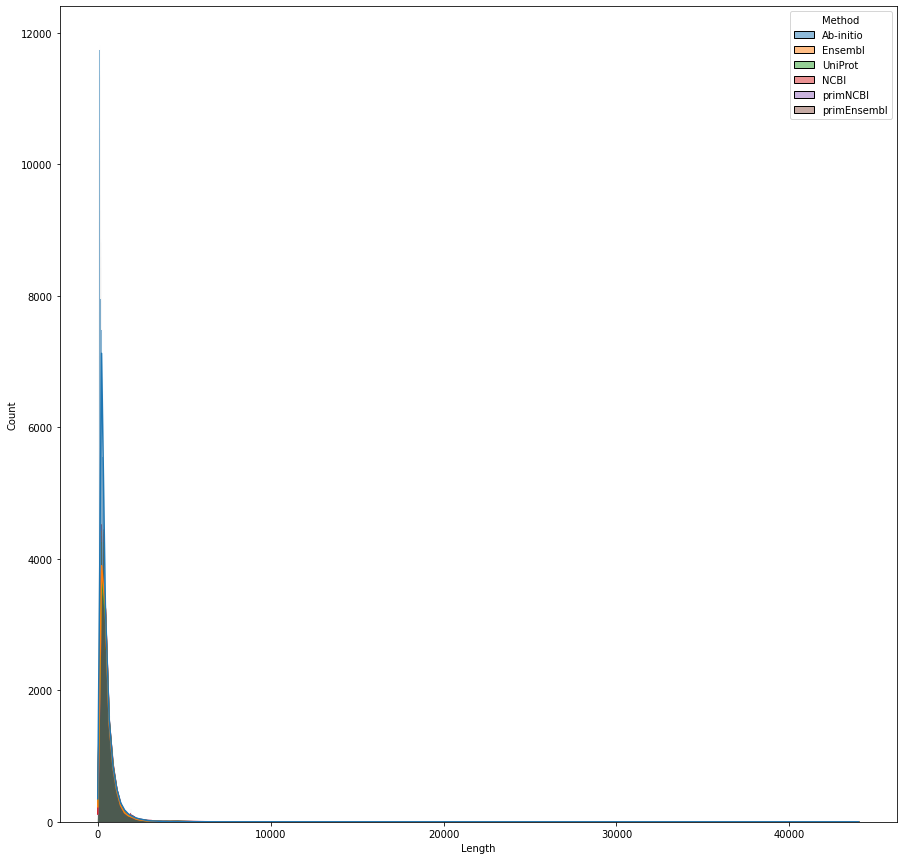

In [19]:
fig, ax = plt.subplots(figsize=(15,15))
ax.set_xlim([0,1500])
fig = sns.histplot(genelength2, x="Length", hue ='Method', kde= True)

### Figure S6 Right Panel

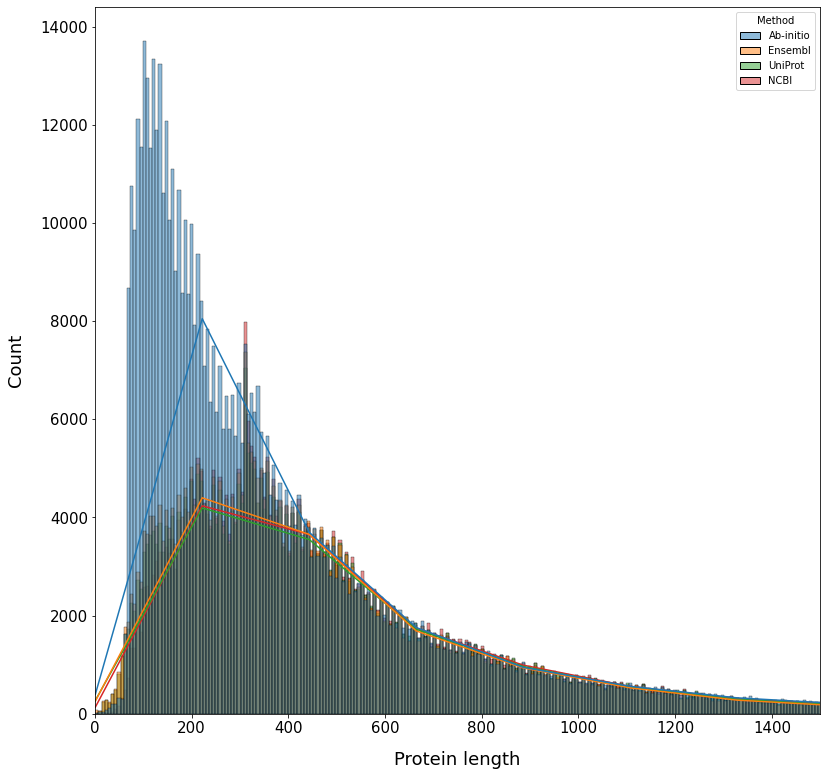

In [30]:
fig, ax = plt.subplots(figsize=(13,13))
ax.set_xlim([0,1500])
fig = sns.histplot(genelength2plot, x="Length", hue ='Method', kde= True)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Count', size=18, labelpad= 15)
ax.set_xlabel('Protein length', size=18, labelpad=15)
plt.savefig('ProteinLengthDistrTotalZoomShort-canonicalprots.png', bbox_inches='tight',dpi=300)

### Figure S6 Left Panel

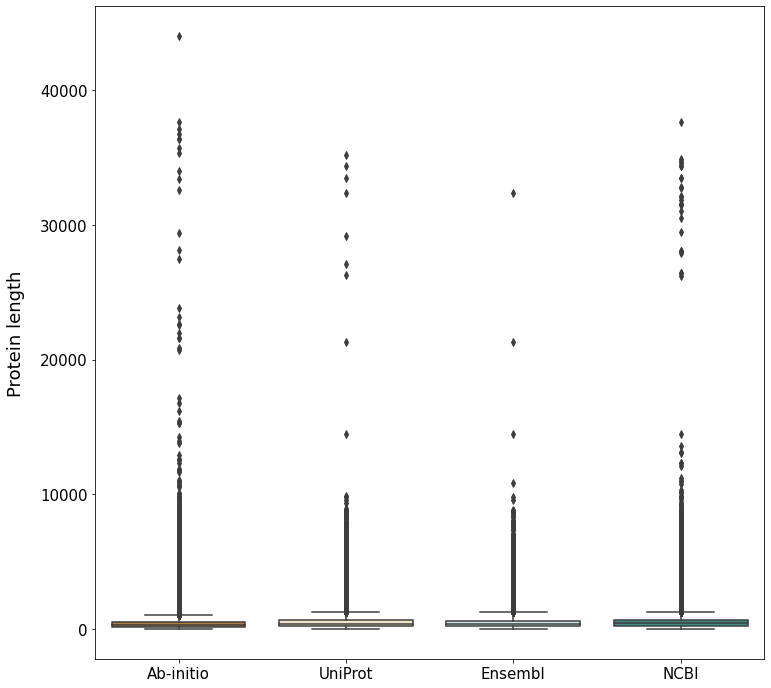

In [28]:
fig, ax = plt.subplots(figsize=(12,12))
#ax.set_xlim([0,])
fig = sns.boxplot(data=genelength2plot, x='Method', y='Length', order =ordermethods, showfliers=True,
                 palette=mypaleta)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_ylabel('Protein length', size=18, labelpad= 15)
ax.set_xlabel('')
plt.savefig('ProteinLengthDistrTotalBoxplot-canonicalprots.png', bbox_inches='tight',dpi=300)


In [19]:
methods= ['Ab-initio', 'Reference proteomes UniProt', 'Ensembl', 'NCBI']

In [12]:
speciesorder = ['C. intestinalis (vase tunicate)', 'E. calabaricus (reedfish)','L. oculatus (spotted gar)', 
                'D. rerio (zebrafish)', 'S. trutta (brown trout)','G. morhua (Atlantic cod)', 
                'E. naucrates (live sharksucker)', 'O. latipes (medaka fish)', 
               'X. tropicalis (western clawed frog)', 'P. muralis (wall lizard)','C. p. bellii (painted turtle)',
              'G. gallus (chicken)', 'T. guttata (zebra finch)', 'S. habroptila (kakapo)',  
              'O. anatinus (platypus)', 'S. harrisii (tasmanian devil)', 'P. sinus (vaquita)',
              'F. catus (domestic cat)', 'M. musculus (house mouse)', 'H. sapiens (human)']

In [21]:
from pandas.api.types import CategoricalDtype

methorder = CategoricalDtype(ordermethods, ordered=True)
genelength2plot['Method'] = genelength2plot['Method'].astype(methorder)
genelength2plot=genelength2plot.sort_values('Method')

<ipython-input-21-28f962564926>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genelength2plot['Method'] = genelength2plot['Method'].astype(methorder)


In [31]:
abinlength=genelength2plot[genelength2plot['Method']=='Ab-initio']
KSabin=pd.DataFrame(columns=['Sp1', 'Sp2', 'KS', 'p'])
for s in speciesorder:
    sp1=s
    subset1=abinlength[abinlength['Species']==s1]['Length']
    for s2 in speciesorder:
        sp2= s2
        subset2=abinlength[abinlength['Species']==s2]['Length']
    
                           

AttributeError: module 'pandas' has no attribute 'dataframe'

In [27]:
genelength2plot

,Method,Species,Protein,Length
0,Ab-initio,NaN,CIOINg1.t1,1425
2359682,Ensembl,NaN,ENSCINP00000007268.3,87
2359681,Ensembl,NaN,ENSCINP00000016940.3,102
2359680,Ensembl,NaN,ENSCINP00000028398.2,235
2359679,Ensembl,NaN,ENSCINP00000035937.1,66
...,...,...,...,...
571457,Ab-initio,NaN,HUMANg15972.t1,306
571456,Ab-initio,NaN,HUMANg15971.t1,123
571455,Ab-initio,NaN,HUMANg15970.t1,752
571454,Ab-initio,NaN,HUMANg15969.t1,156


In [32]:
result = genelength2plot.groupby(['Method', 'Species'])['Length'].describe().loc[:, ['50%']]
#result.to_csv('resultmedian.csv')

In [25]:
result=pd.read_csv('resultmedian.csv')

### Figure 6a)

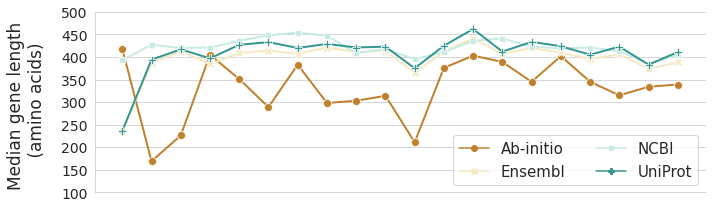

In [35]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,3))
fig=sns.lineplot(data=result,x="Species", y="50%", hue="Method",palette=mypaleta,
                  style="Method",linewidth=2, markersize=8, markers=True, dashes=False)


ax.set_ylabel('Median gene length \n (amino acids)', fontsize=17, labelpad=15)
plt.xticks([])
ax.set_xlabel('')
ax.set_ylim([100,500])
plt.yticks(fontsize=14)

legend = ax.legend(fontsize=15, ncol=2)
sns.despine()
plt.tight_layout()
#plt.show()
#plt.savefig('Proteinlineplot_allspecies-noname2.png', bbox_inches='tight', dpi=600)

### Figure S7

In [38]:
paleta2= ["palevioletred", "mediumvioletred", "indigo", "mediumblue", "#4a8dff","turquoise", "#89bbff", "#cdddff", 
          "darkorange", "#ffd343", "olive", "#0A6921", "#1A8828", "#64AD62",
          '#CE9C69', "#B5724F","#974C02", "#5F280B","lightcoral",  "darkred"]

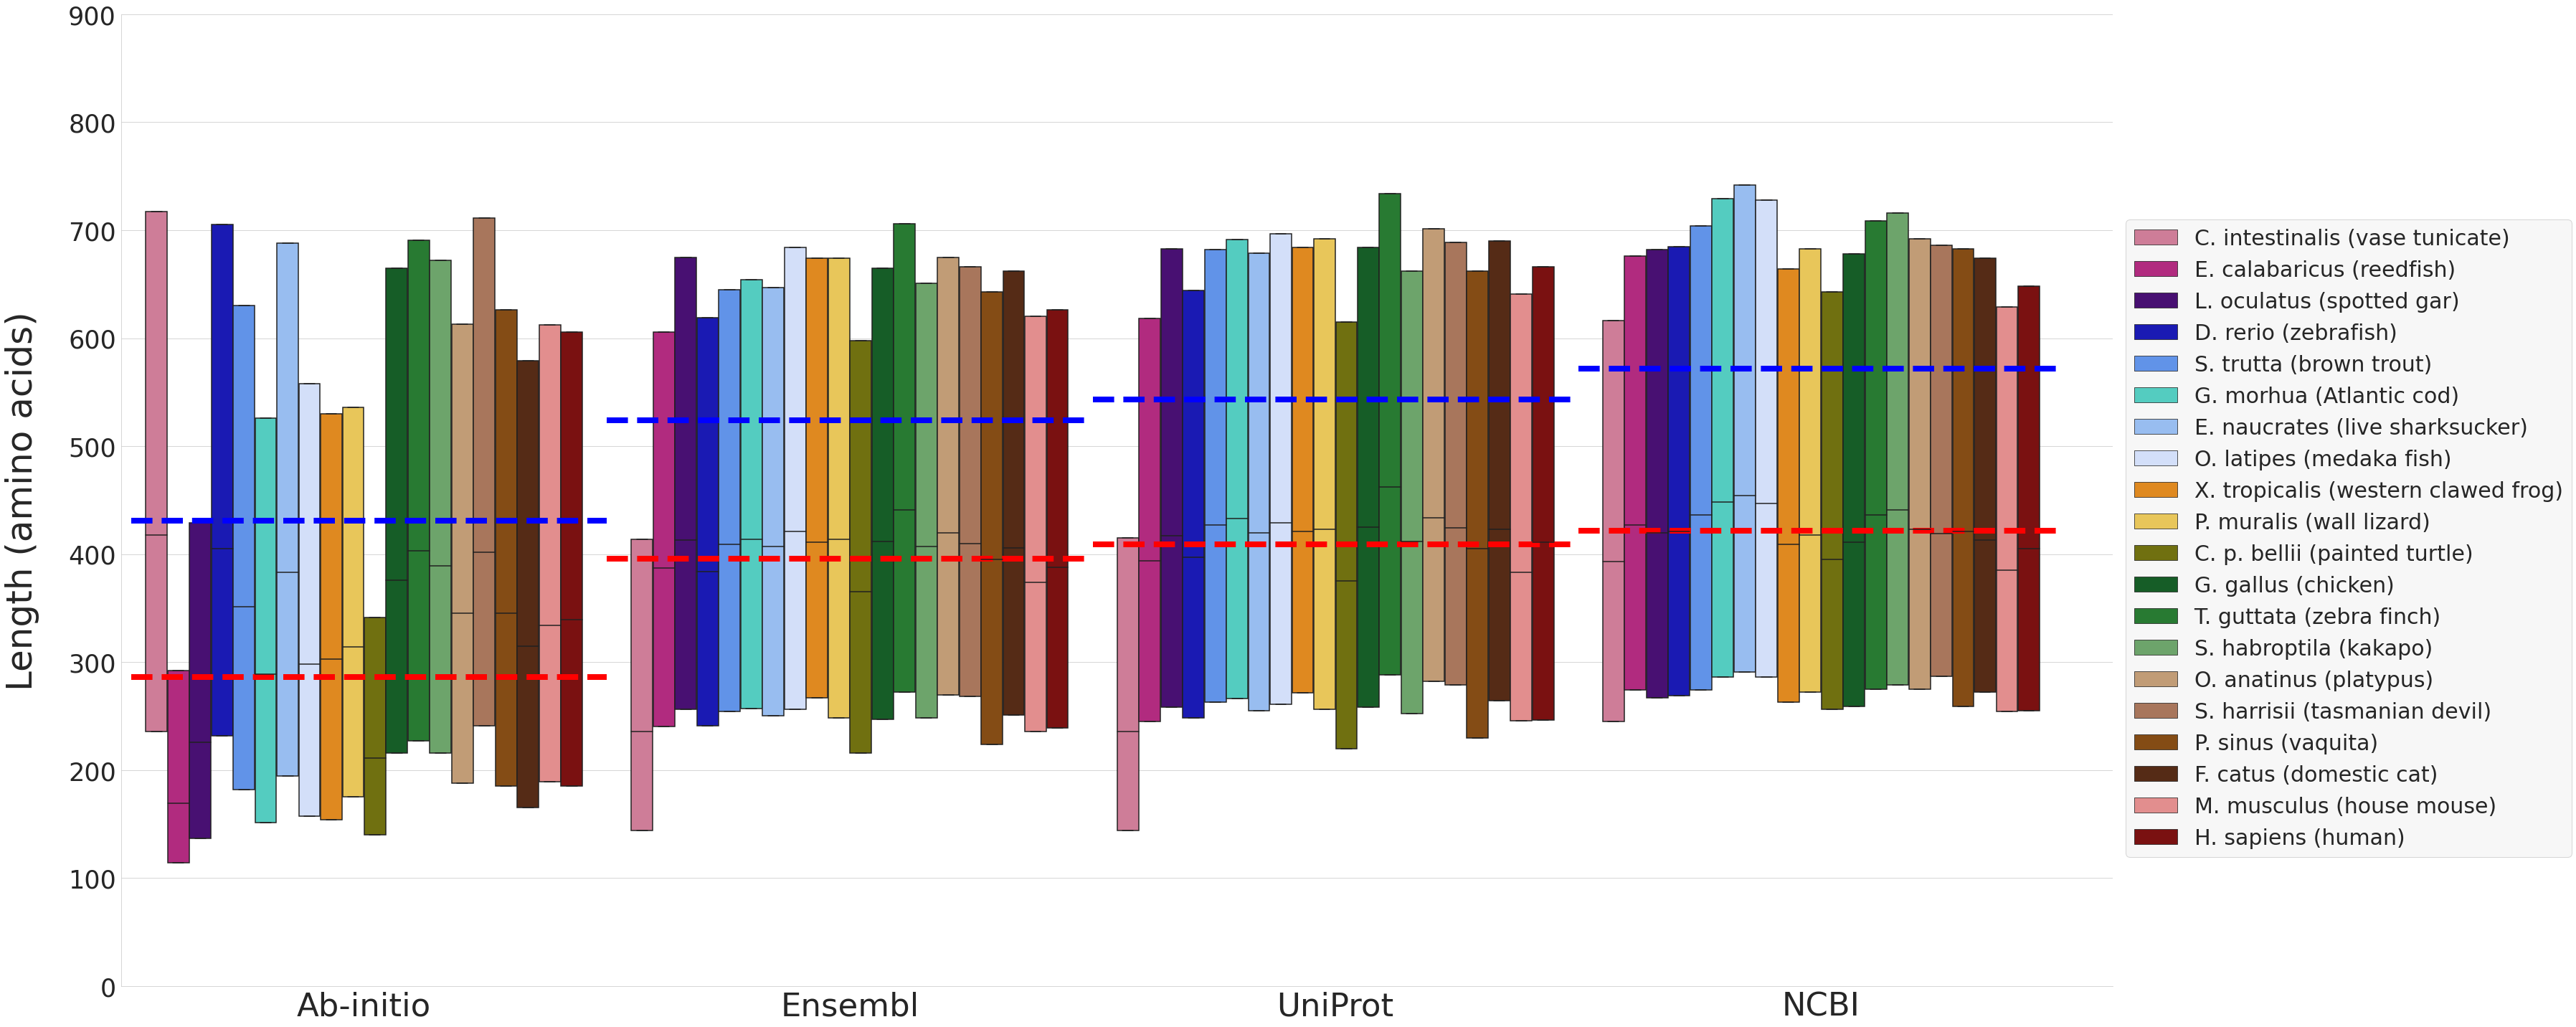

In [39]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(50,20))
fig = sns.boxplot(data=genelength2plot, x='Method', y='Length', hue= 'Species', 
                  palette=paleta2, whis=0, showfliers=False, width=0.9)
#ax.set(xlabel='Method', ylabel='Protein length')
ax.yaxis.labelpad = 20
ax.xaxis.labelpad=20
ax.set_ylim([0,900])
labels = ax.get_xticklabels()
#plt.setp(labels, rotation=90)
#ax.legend(fontsize=25, bbox_to_anchor=(1.001, 0.8), title= 'Species')
# Create the legend
legend = ax.legend(fontsize=30, bbox_to_anchor=(1.001, 0.8))

# Change the background color of the legend
legend.set_frame_on(True)
legend.get_frame().set_facecolor('whitesmoke')  # Set the background color to light gray

ax.set_ylabel('Length (amino acids)', fontsize=50, labelpad=40)
ax.set_xlabel('')
plt.xticks(fontsize=45)
plt.yticks(fontsize=35)
#fig.legend(loc='upper right', title = 'Annotation Method')

reference=[286, 396, 409, 422]

plt.hlines(286, xmin=-0.48, xmax=0.5, color='r', linestyles='--', linewidth=8) #median
plt.hlines(431, xmin=-0.48, xmax=0.5, color='b', linestyles='--', linewidth=8) #mean

plt.hlines(396, xmin=0.5, xmax=1.5, color='r', linestyles='--', linewidth=8) #median
plt.hlines(524, xmin=0.5, xmax=1.5, color='b', linestyles='--', linewidth=8) #mean

plt.hlines(409, xmin=1.5, xmax=2.5, color='r', linestyles='--', linewidth=8) #median
plt.hlines(543, xmin=1.5, xmax=2.5, color='b', linestyles='--', linewidth=8)#mean

plt.hlines(422, xmin=2.5, xmax=3.5, color='r', linestyles='--', linewidth=8) #median
plt.hlines(572, xmin=2.5, xmax=3.5, color='b', linestyles='--', linewidth=8) #mean

ax.set_xlim(-0.5, len(genelength2plot['Method'].unique()) - 0.4)

plt.margins(x=0)
sns.despine()
plt.tight_layout()
#plt.show()
#plt.savefig('Canonical_proteinlengthboxplot_allspecies.png', bbox_inches='tight', dpi=600)

In [36]:
ordermethods=['Ab-initio', 'UniProt', 'Ensembl','NCBI']
mypaleta=['#BF812D', '#E2D7A1',  '#A8DFD4', '#35978F']

In [37]:
orthlengthst=orthlength.groupby(['Method']).describe()
orthlengthst
#orthlengthst.to_csv('OrthologyLengthDesc.csv', index=False)

Length                                                     \
                count        mean         std   min    25%    50%    75%   
Method                                                                     
Ab-initio    365956.0  571.055124  588.441023  54.0  256.0  409.0  689.0   
Ensembl      397347.0  549.950544  491.819608  50.0  267.0  419.0  669.0   
NCBI         395108.0  587.851220  597.326962  50.0  284.0  435.0  704.0   
UniProt      385244.0  572.145580  529.416403  50.0  278.0  434.0  695.0   
primEnsembl  389775.0  551.188640  492.245281  50.0  268.0  420.0  671.0   
primNCBI     392836.0  587.354934  596.880070  50.0  284.0  435.0  704.0   

                      
                 max  
Method                
Ab-initio    37618.0  
Ensembl      32359.0  
NCBI         37665.0  
UniProt      35213.0  
primEnsembl  32359.0  
primNCBI     37665.0

In [37]:
notorthlengthst=notorthlength.groupby(['Method']).describe()
notorthlengthst
#notorthlengthst.to_csv('SingletonsLengthDesc.csv', index=False)

Length                                                     \
                count        mean         std   min    25%    50%    75%   
Method                                                                     
Ab-initio    279422.0  247.567693  297.759935   1.0  111.0  164.0  273.0   
Ensembl       34974.0  240.101390  242.169067   2.0  100.0  173.0  292.0   
NCBI          25780.0  362.183049  358.571829  24.0  174.0  264.0  430.0   
UniProt       42952.0  281.783735  301.056481   2.0  114.0  198.0  348.0   
primEnsembl   34721.0  240.029204  241.761505   2.0  101.0  173.0  292.0   
primNCBI      25337.0  361.701070  358.349364  24.0  174.0  264.0  429.0   

                      
                 max  
Method                
Ab-initio    44005.0  
Ensembl       9786.0  
NCBI         13171.0  
UniProt       7963.0  
primEnsembl   9786.0  
primNCBI     13171.0

## Welch's ANOVA, differences between annotations gorups within singletons and genes with orthology

### Genes with orthology

Results can be also input bellow from the provided tables "GamesHowellOrthLength.csv" and "GamesHowellSingletonsLength.csv"

In [ ]:
# generate model for linear regression
my_model = smf.ols(formula='Length ~ Method', data=orthlength)

# fit model to data to obtain parameter estimates
my_model_fit = my_model.fit()

# print summary of linear regression
print('Model summary:')
print(my_model_fit.summary())
print('\n')
# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print('Anova table')
print(anova_table)

In [ ]:
res=my_model_fit.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, distargs=(3,))
plt.show()

In [ ]:
shapirores = stats.shapiro(res)
shapirores

Residuals are not normally distributed

In [ ]:
values={}

for i in methods:
    values[f'{i}']= np.array(orthlength[orthlength['Method']==i]['Length'])
    
leveneres = stats.levene(values['Ab-initio'],values['UniProt'], values['Ensembl'], values['NCBI'])
leveneres

Heteroscedacity :D

In [ ]:
stats.kruskal(values['Ab-initio'],values['UniProt'], values['Ensembl'], values['NCBI'])

In [ ]:
statorthlength=orthlength[orthlength['Method'].isin(methods)]

In [ ]:
welchres=pg.welch_anova(dv='Length', between='Method', data=statorthlength)
welchres #We reject

In [ ]:
gameshowellres=pg.pairwise_gameshowell(dv='Length', between='Method', data=statorthlength)

In [ ]:
#gameshowellres.to_csv('GamesHowellOrthLength.csv')
gameshowellresorth=pd.read_csv('GamesHowellOrthLength.csv')

### Singletons

In [ ]:
# generate model for linear regression
my_model = smf.ols(formula='Length ~ Method', data=notorthlength)

# fit model to data to obtain parameter estimates
my_model_fit = my_model.fit()

# print summary of linear regression
print('Model summary:')
print(my_model_fit.summary())
print('\n')
# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print('Anova table')
print(anova_table)

In [ ]:
res=my_model_fit.resid
import scipy.stats as stats
fig = sm.qqplot(res, stats.t, distargs=(3,))
plt.show()

In [ ]:
shapirores = stats.shapiro(res)
shapirores

Not normally distributed

In [ ]:
values={}

for i in methods:
    values[f'{i}']= np.array(notorthlength[notorthlength['Method']==i]['Length'])

leveneres = stats.levene(values['Ab-initio'],values['UniProt'], values['Ensembl'], values['NCBI'])
leveneres

LeveneResult(statistic=443.704227686744, pvalue=8.26309444850189e-288)

Data is heteroscedeous

In [ ]:
stats.kruskal(values['Ab-initio'],values['UniProt'], values['Ensembl'], values['NCBI'])

In [ ]:
statnotorthlength=notorthlength[notorthlength['Method'].isin(methods)]

In [ ]:
welchres=pg.welch_anova(dv='Length', between='Method', data=statorthlength)
welchres #Super reject if that was a thing

In [ ]:
gameshowellressingl=pg.pairwise_gameshowell(dv='Length', between='Method', data=statnotorthlength)

In [1]:
#gameshowellressingl.to_csv('GamesHowellSingletonsLength.csv')
gameshowellressingl= pd.read_csv('GamesHowellSingletonsLength.csv')

NameError: name 'pd' is not defined

### Figure 6 b)

In [ ]:
def plot_significance(ax, resultstable, fontsize):
  
    methods = ordermethods

    # Replace with your actual p-values
    p_values = {
    ('Ab-initio', 'Ensembl'): resultstable[(resultstable['A'] == 'Ab-initio') & (resultstable['B'] == 'Ensembl')]['pval'][0],
    ('Ab-initio', 'NCBI'): resultstable[(resultstable['A']=='Ab-initio')& (resultstable['B']=='NCBI')]['pval'] [1],
    ('Ab-initio', 'UniProt'): resultstable[(resultstable['A']=='Ab-initio') & (resultstable['B']=='UniProt')]['pval'] [2],
    ('Ensembl', 'NCBI'): resultstable[(resultstable['A']=='Ensembl')& (resultstable['B']=='NCBI')]['pval'][3],
    ('Ensembl', 'UniProt'): resultstable[(resultstable['A']=='Ensembl')& (resultstable['B']=='UniProt')]['pval'][4],
    ('NCBI', 'UniProt'): resultstable[(resultstable['A']=='NCBI')& (resultstable['B']=='UniProt')]['pval'][5]
    # Add more pairs and their respective p-values here
    }

    # Set significance levels
    alpha_levels = [0.05, 0.01, 0.001]
    increase=0
    # Get the y-axis limits
    bottom, top = ax.get_ylim()
    y_range = top - bottom
    loop=0
    # Significance bars
    for i, ((method1, method2), p) in enumerate(p_values.items()):
        if p<0.05:
            loop+=1
            x1 = methods.index(method1)
            x2 = methods.index(method2)
        

            # What level is this bar among the bars above the plot?
            level = len(p_values) - loop
            # Plot the bar
            bar_height = (1600 + level*120)
            bar_tips = bar_height - (y_range * 0.02)
        
            ax.plot(
            [x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
        
            # Determine the significance symbol
            sig_symbol = ''
            for alpha_level in alpha_levels:
                if p < alpha_level:
                    if alpha_level == 0.001:
                        sig_symbol = '***'
                    elif alpha_level == 0.01:
                        sig_symbol = '**'
                    elif alpha_level == 0.05:
                        sig_symbol = '*'

            text_height = bar_height - 30
            ax.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', fontsize=fontsize)

In [ ]:
def plot_annot_significance(ax, resultstable, fontsize):
  
    methods = ordermethods

    # Replace with your actual p-values
    p_values = {
    ('Ab-initio', 'Ensembl'): resultstable[(resultstable['A'] == 'Ab-initio') & (resultstable['B'] == 'Ensembl')]['pval'][0],
    ('Ab-initio', 'NCBI'): resultstable[(resultstable['A']=='Ab-initio')& (resultstable['B']=='NCBI')]['pval'] [1],
    ('Ab-initio', 'UniProt'): resultstable[(resultstable['A']=='Ab-initio') & (resultstable['B']=='UniProt')]['pval'] [2],
    ('Ensembl', 'NCBI'): resultstable[(resultstable['A']=='Ensembl')& (resultstable['B']=='NCBI')]['pval'][3],
    ('Ensembl', 'UniProt'): resultstable[(resultstable['A']=='Ensembl')& (resultstable['B']=='UniProt')]['pval'][4],
    ('NCBI', 'UniProt'): resultstable[(resultstable['A']=='NCBI')& (resultstable['B']=='UniProt')]['pval'][5]
    # Add more pairs and their respective p-values here
    }

    # Set significance levels
    alpha_levels = [0.05, 0.01, 0.001]
    increase=0
    # Get the y-axis limits
    bottom, top = ax.get_ylim()
    y_range = top - bottom
    # Significance bars
    for i, ((method1, method2), p) in enumerate(p_values.items()):
    
        x1 = methods.index(method1)
        x2 = methods.index(method2)
        

        # What level is this bar among the bars above the plot?
        level = len(p_values) - i
        # Plot the bar
        bar_height = (1100 + level*120)
        bar_tips = bar_height - (bar_height * 0.02)
        if p<0.05:
            ax.plot(
            [x1, x1, x2, x2],
            [bar_tips, bar_height, bar_height, bar_tips], lw=1, c='k')
        
        # Determine the significance symbol
        sig_symbol = ''
        for alpha_level in alpha_levels:
            if p < alpha_level:
                if alpha_level == 0.001:
                    sig_symbol = '***'
                elif alpha_level == 0.01:
                    sig_symbol = '**'
                elif alpha_level == 0.05:
                    sig_symbol = '*'

        text_height = bar_height - 30
        ax.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', fontsize=fontsize)

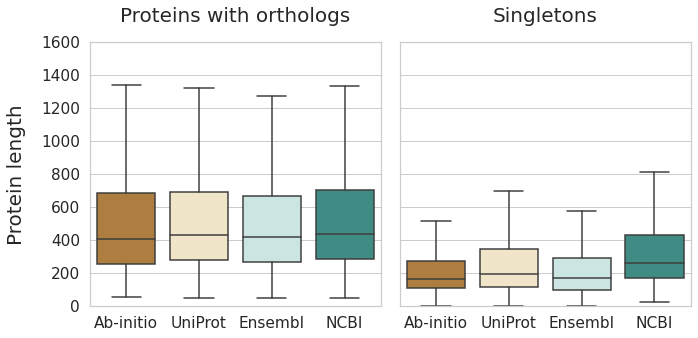

In [58]:
sns.set(font_scale=1.4)
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5), sharex=True, sharey=True)
ax1 = sns.boxplot(data=orthlength, x='Method', y='Length', order =ordermethods, showfliers=False, 
                  palette= mypaleta, ax=ax1)
plot_significance(ax1,gameshowellresorth, 12)

ax2= sns.boxplot(data=notorthlength, x='Method', y='Length', order =ordermethods, showfliers=False,
                 palette=mypaleta, ax=ax2)
plot_annot_significance(ax2,gameshowellressingl,12)

ax1.set_ylim((0,2300))
ax2.set_ylim((0,2300))
ax1.set_ylabel('Protein length', size=20, labelpad= 15)
ax2.set_ylabel('')
ax1.set_xlabel('')
ax2.set_xlabel('')
ax1.set_title('Proteins with orthologs', size= 20, pad=10)
ax2.set_title('Singletons', size=20, pad=10)

plt.tight_layout()
plt.savefig('ProteinLength-CanonicalOrthology-new_wSignificance.png', bbox_inches='tight',dpi=300)

In [43]:
statslength2=genelength2.groupby(['Method']).describe()['Length']
#statslength2.to_csv('DescrLengthTotal.csv', index=False)

In [44]:
statslength2sp=genelength2plot.groupby(['Method','Species']).describe()['Length']
#pd.set_option('display.max_rows', 120)
statslength2sp

count        mean         std  \
Method    Species                                                            
Ab-initio C. intestinalis (vase tunicate)  13196.0  587.237875  667.740078   
          E. calabaricus (reedfish)        78579.0  249.338347  257.867127   
          L. oculatus (spotted gar)        36227.0  360.272283  416.437873   
          D. rerio (zebrafish)             23288.0  572.593653  656.834187   
          S. trutta (brown trout)          51185.0  508.474553  560.288128   
...                                            ...         ...         ...   
UniProt   S. harrisii (tasmanian devil)    19171.0  566.010380  515.017884   
          P. sinus (vaquita)               18892.0  536.783242  509.399713   
          F. catus (domestic cat)          19652.0  563.930389  554.057233   
          M. musculus (house mouse)        21984.0  533.440411  573.536238   
          H. sapiens (human)               20598.0  553.675648  598.475194   

                                            min     25%    50%    75%      max  
Method    Species                                                               
Ab-initio C. intestinalis (vase tunicate)  36.0  236.00  418.0  717.0  33420.0  
          E. calabaricus (reedfish)         3.0  114.00  169.0  292.0  16208.0  
          L. oculatus (spotted gar)        17.0  137.00  226.0  429.0  22541.0  
          D. rerio (zebrafish)              1.0  232.00  405.0  705.0  44005.0  
          S. trutta (brown trout)           2.0  182.00  351.0  630.0  29370.0  
...                                         ...     ...    ...    ...      ...  
UniProt   S. harrisii (tasmanian devil)    13.0  279.00  424.0  689.0   8801.0  
          P. sinus (vaquita)               24.0  230.00  405.0  662.0   8798.0  
          F. catus (domestic cat)          13.0  264.00  423.0  690.0  27108.0  
          M. musculus (house mouse)         5.0  245.75  383.0  641.0  35213.0  
          H. sapiens (human)                2.0  246.00  411.0  666.0  34350.0  

[80 rows x 8 columns]

In [61]:
#statslength2sp.to_csv('ProtLengthStats_canonical_4methods_2.csv')

In [25]:
statslength2sp=pd.read_csv('ProtLengthStats_canonical_4methods_2.csv')

In [138]:
counts=stats2['count']

In [104]:
speciesorder = CategoricalDtype(['CIOIN', 'LEPOC', 'DANRE', 'SALTR', 'GADMO', 'ORYLA', 'ECNAU', 'ERCAL', 'XENTR', 'CHPIB', 'CHICK', 'KAKAP', 'TAEGU', 'PODMU', 'ORANA', 'SARHA', 'HUMAN', 'MOUSE', 'FELCA', 'PHOSI'], ordered=True)

In [112]:
stats2['Species'] = stats2['Species'].astype(speciesorder)
stats2=stats2.sort_values('Species')

In [39]:
especies=['C. intestinalis (vase tunicate)','E. calabaricus (reedfish)','L. oculatus (spotted gar)',
          'D. rerio (zebrafish)','S. trutta (brown trout)', 'G. morrhua (Atlantic cod)','E. naucrates (live sharksucker)', 
          'O. latipes (medaka fish)', 'X. tropicalis (western clawed frog)', 'P. muralis (wall lizard)', 'C. p. bellii (painted turtle)', 
          'G. gallus (chicken)', 'T. guttata (zebra finch)', 'S. habroptila (kakapo)', 'O. anatinus (platypus)', 
          'S. harrisii (tasmanian devil)', 'P. sinus (vaquita)', 'F. catus (domestic cat)', 'M. musculus (house mouse)', 
          'H. sapiens (human)']
#methodorder=['Ab-initio', 'RP']

### CALCULATE KS STATISTIC AND HEATMAP

In [31]:
genelength2plot

,Method,Species,Protein,Length
0,Ab-initio,C. intestinalis (vase tunicate),CIOINg1.t1,1425
2359682,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000007268.3,87
2359681,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000016940.3,102
2359680,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000028398.2,235
2359679,Ensembl,C. intestinalis (vase tunicate),ENSCINP00000035937.1,66
...,...,...,...,...
571457,Ab-initio,H. sapiens (human),HUMANg15972.t1,306
571456,Ab-initio,H. sapiens (human),HUMANg15971.t1,123
571455,Ab-initio,H. sapiens (human),HUMANg15970.t1,752
571454,Ab-initio,H. sapiens (human),HUMANg15969.t1,156


In [35]:
Especies =['C. intestinalis (vase tunicate)', 'L. oculatus (spotted gar)', 'D. rerio (zebrafish)', 
              'S. trutta (brown trout)','G. morhua (Atlantic cod)', 'O. latipes (medaka fish)', 'E. naucrates (live sharksucker)',
              'E. calabaricus (reedfish)', 'X. tropicalis (western clawed frog)', 'C. p. bellii (painted turtle)',
              'G. gallus (chicken)', 'S. habroptila (kakapo)', 'T. guttata (zebra finch)', 
              'P. muralis (wall lizard)','O. anatinus (platypus)', 'S. harrisii (tasmanian devil)', 
              'H. sapiens (human)', 'M. musculus (house mouse)', 'F. catus (domestic cat)', 'P. sinus (vaquita)']

In [29]:
otax_list = list()
for i in toplot:
    for j in speciesorder:
        otax_list.append(str(i+ '_' + j))

In [30]:
otax_list

['Ab-initio_C. intestinalis (vase tunicate)',
 'Ab-initio_E. calabaricus (reedfish)',
 'Ab-initio_L. oculatus (spotted gar)',
 'Ab-initio_D. rerio (zebrafish)',
 'Ab-initio_S. trutta (brown trout)',
 'Ab-initio_G. morhua (Atlantic cod)',
 'Ab-initio_E. naucrates (live sharksucker)',
 'Ab-initio_O. latipes (medaka fish)',
 'Ab-initio_X. tropicalis (western clawed frog)',
 'Ab-initio_P. muralis (wall lizard)',
 'Ab-initio_C. p. bellii (painted turtle)',
 'Ab-initio_G. gallus (chicken)',
 'Ab-initio_T. guttata (zebra finch)',
 'Ab-initio_S. habroptila (kakapo)',
 'Ab-initio_O. anatinus (platypus)',
 'Ab-initio_S. harrisii (tasmanian devil)',
 'Ab-initio_P. sinus (vaquita)',
 'Ab-initio_F. catus (domestic cat)',
 'Ab-initio_M. musculus (house mouse)',
 'Ab-initio_H. sapiens (human)',
 'UniProt_C. intestinalis (vase tunicate)',
 'UniProt_E. calabaricus (reedfish)',
 'UniProt_L. oculatus (spotted gar)',
 'UniProt_D. rerio (zebrafish)',
 'UniProt_S. trutta (brown trout)',
 'UniProt_G. morhua 

In [31]:
from scipy import stats

In [66]:
label = []
print(len(otax_list))
for i in range(len(otax_list)):
    print(i)
    tax = otax_list[i]
    print(tax)
    label[i] = tax
    for j in range(i,len(otax_list)):    
        tax_vs = otax_list[j]
        label[j] = tax_vs
        lengthdata=genelength2plot[(genelength2plot['Method']==tax.split('_')[0]) &
                                       (genelength2plot['Species']==tax.split('_')[1])]['Length']
        print(lengthdata)

80
0
Ab-initio_C. intestinalis (vase tunicate)


IndexError: list assignment index out of range

In [32]:
def make_ks_matrix(otax_list, gendata):
    #Create a pairwise comparison matrix of distribution, containing the Kolmogorov Smirnov summary statistics
    
    comparison = np.zeros((len(otax_list),len(otax_list)))
    label = []

    for i in range(len(otax_list)):
        print(i)
        tax = otax_list[i]
        #label[i] = tax
        for j in range(i,len(otax_list)):
            
            tax_vs = otax_list[j]
            #label[j] = tax_vs
            lengthdata=genelength2plot[(genelength2plot['Method']==tax.split('_')[0]) &
                                       (genelength2plot['Species']==tax.split('_')[1])]['Length']
            lengthdatavs=genelength2plot[(genelength2plot['Method']==tax_vs.split('_')[0]) &
                                       (genelength2plot['Species']==tax_vs.split('_')[1])]['Length']
            dist = stats.ks_2samp(lengthdata, lengthdatavs)[0]
            comparison[i,j] = dist
            comparison[j,i] = dist
    return comparison#, label

In [33]:
clength = make_ks_matrix(otax_list, genelength2plot)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


In [35]:
import pickle
pickle.dump(clength,open("Prot_lengths_ks2.p", "wb" ))

### Figure S8

<ipython-input-38-4d8ada480e9d>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  ax = sns.heatmap(clength, cmap=cm.get_cmap('coolwarm'),  xticklabels=False, yticklabels=False, vmin=0, vmax=1,mask = mask)


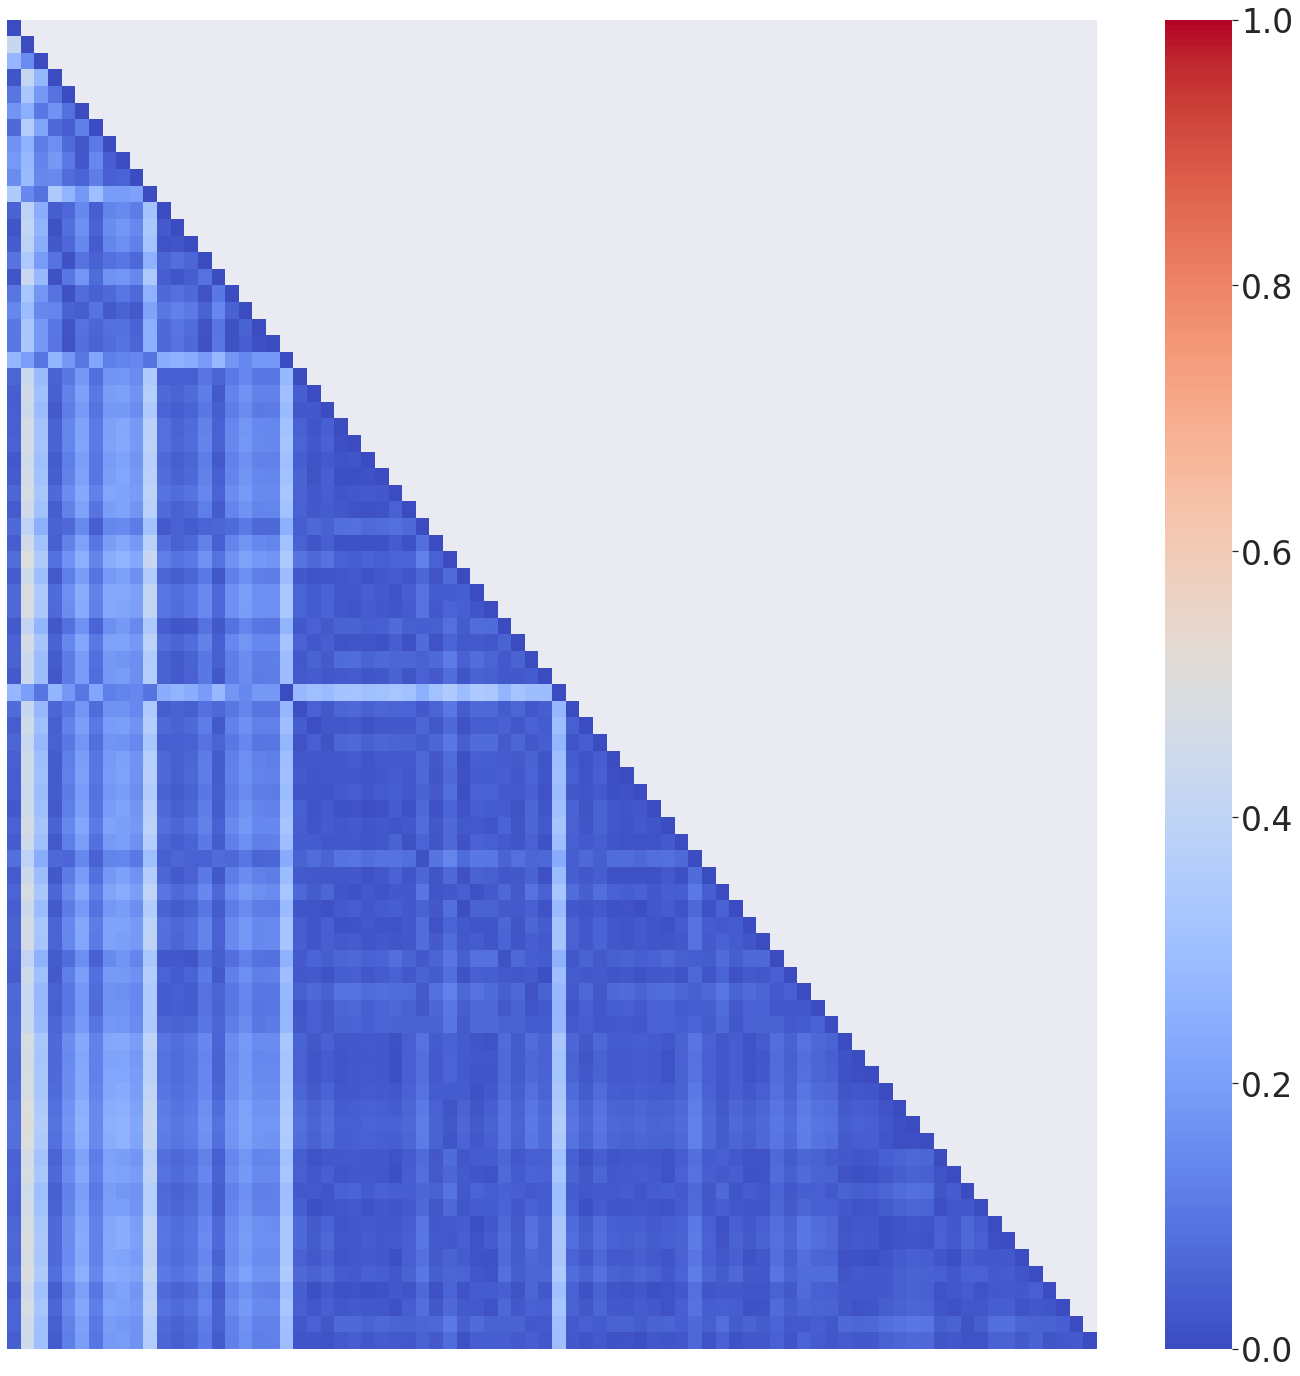

In [38]:
from matplotlib import cm 
plt.figure(figsize = (20,20))
sns.set(font_scale=3)
mask = np.triu(clength)

#ax = sns.heatmap(cgc[0], xticklabels=clade_labels, yticklabels=clade_labels, cmap=cm.get_cmap('coolwarm'), vmin=0, vmax=1)
ax = sns.heatmap(clength, cmap=cm.get_cmap('coolwarm'),  xticklabels=False, yticklabels=False, vmin=0, vmax=1,mask = mask)

plt.tight_layout()
plt.savefig('KS_heatmap2.jpg', dpi=300)

In [ ]:
# Method list
methods = ['Ab-initio','UniProt', 'Ensembl', 'NCBI']

# Function to calculate the average KS for each method
def calculate_average_ks(comparison_matrix, otax_list, methods):
    method_indices = {method: [] for method in methods}
    
    # Identify the indices for each method in otax_list
    for idx, tax in enumerate(otax_list):
        method = tax.split('_')[0]
        if method in methods:
            method_indices[method].append(idx)
    
    # Calculate the average KS for each method
    average_ks = {}
    for method, indices in method_indices.items():
        if indices:
            ks_values = []
            for i in indices:
                for j in indices:
                    if i < j:  # To avoid duplicate pairs and self-comparisons
                        ks_values.append(comparison_matrix[i, j])
            if ks_values:
                average_ks[method] = np.mean(ks_values)
            else:
                average_ks[method] = np.nan
    return average_ks

# Calculate and print the average KS statistics
average_ks = calculate_average_ks(clength, otax_list, methods)
print(average_ks)

In [40]:
import toytree
import toyplot

tre3=toytree.tree('cladogram20species.nwk')

In [56]:
# make the canvas and axes
canvas = toyplot.Canvas(width=350, height=170)
axes = canvas.cartesian()
axes.show = False

# draw a rectangle (x1, x2, y1, y2)
axes.rectangle(
    -5.5, 0.35, -4.5, 0.5,
    opacity=0.25,
    color="darkred",
)

#draw a rectangle (x1, x2, y1, y2)
axes.rectangle(
    -8.5, -5.6, -2.5, 0.5,
    opacity=0.25,
    color="#1A8828",
)

axes.rectangle(
    -16.5, -11.5, -4.5, 0.5,
    opacity=0.25,
    color=toytree.colors[2],
)
# add tree to the axes
tre3.draw(layout='u',axes=axes, tip_labels=False);

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="350.0px" height="170.0px" viewBox="0 0 350.0 170.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="te35780d37f1f414198a0c8ebedfe3278">

In [57]:
import toyplot.svg
toyplot.svg.render(canvas, "Smalltree.svg")